In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
# import lightgbm as lgb
# import xgboost as xgb

from sklearn.dummy import DummyClassifier

In [2]:
dataset = pd.read_csv('csv/dataset1.csv')
dataset = dataset[dataset['Квалификация'] != 3]
dataset = dataset[dataset['Квалификация'] != 4]
dataset.drop('Учебный год', axis=1, inplace=True)
dataset = dataset[dataset['Форма обучения'] != 1]
dataset.drop('Накоп незачет', axis=1, inplace=True)
dataset.drop('незачет', axis=1, inplace=True)



data = dataset.iloc[:, :-1]
target = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

clf = DummyClassifier(strategy='most_frequent')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Число ошибочно классифицированных образцов DummyClassifier: % d" % (y_test != y_pred).sum())
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_name))

print()
print('Логик регрессион')
print('Вероятность моего отчисления за первый семестр:',clf.predict(pd.read_csv('uspevaemost_nakop_My.csv').iloc[:1,:])[:, 1] * 100)
print('Вероятность моего отчисления за второй семестр:',clf.predict(pd.read_csv('uspevaemost_nakop_My.csv').iloc[1:2,:])[:, 1] * 100)
print('Вероятность моего отчисления за третий семестр:',clf.predict(pd.read_csv('uspevaemost_nakop_My.csv').iloc[2:3,:])[:, 1] * 100)
print('Вероятность моего отчисления за четвертый семестр:',clf.predict(pd.read_csv('uspevaemost_nakop_My.csv').iloc[3:4,:])[:, 1] * 100)
print()

                 precision    recall  f1-score   support

0 - не отчислен       0.90      0.99      0.95      4748
       Отчислен       0.64      0.10      0.18       573

       accuracy                           0.90      5321
      macro avg       0.77      0.55      0.56      5321
   weighted avg       0.87      0.90      0.86      5321

AUC-ROC: 0.5487755660140176
Coefficients: [[-1.42944295  0.04299714 -0.35558316 -0.1957108   0.13054974 -0.17632708
  -0.41982455  0.07581447  0.0035735  -0.1420495   0.11738264  0.02298248
   0.02911879  0.19421892 -0.16092866 -0.6432354   0.70036963  0.78184024
   0.02337543 -0.12935005 -0.09931055  0.28807182 -0.48475675  0.19742041
  -0.04270519 -0.66088986  0.1752131 ]]
Intercept: [-2.9407963]


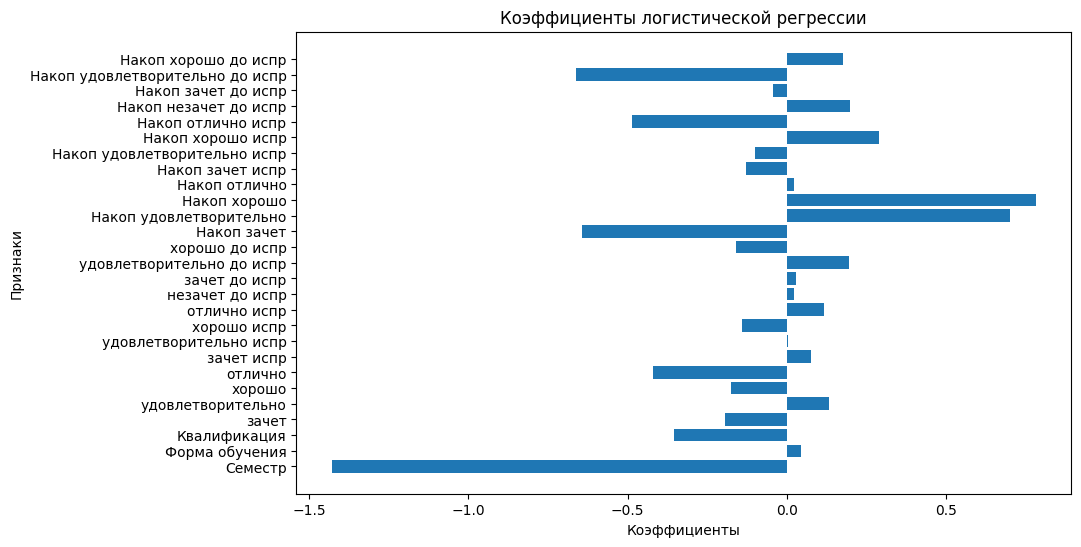

In [8]:
lr = LogisticRegression(C=1000.0, max_iter=1000000)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

target_name = ['0 - не отчислен', 'Отчислен']
print(classification_report(y_test, y_pred, target_names=target_name))
confusion_matrix(y_test, y_pred)

auc_roc = roc_auc_score(y_test, y_pred)

print(f'AUC-ROC: {auc_roc}')

coefficients = lr.coef_
intercept = lr.intercept_

# Вывод коэффициентов и свободного члена
print("Coefficients:", coefficients)
print("Intercept:", intercept)

feature_names = ["Семестр","Форма обучения","Квалификация",
                 "зачет","удовлетворительно","хорошо","отлично",
                 "зачет испр","удовлетворительно испр","хорошо испр","отлично испр",
                 "незачет до испр","зачет до испр","удовлетворительно до испр","хорошо до испр",
                 "Накоп зачет","Накоп удовлетворительно","Накоп хорошо","Накоп отлично",
                 "Накоп зачет испр","Накоп удовлетворительно испр","Накоп хорошо испр","Накоп отлично испр",
                 "Накоп незачет до испр","Накоп зачет до испр","Накоп удовлетворительно до испр","Накоп хорошо до испр"]

# После обучения модели Logistic Regression (например, clf_lr)
coefficients = lr.coef_[0]  # Берем коэффициенты для первого класса (в данном случае)

# Создаем график
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)

# Подписываем оси
plt.xlabel('Коэффициенты')
plt.ylabel('Признаки')
plt.title('Коэффициенты логистической регрессии')

plt.show()

# print('Логик регрессион')
# print('Вероятность моего отчисления за первый семестр:',lr.predict_proba(pd.read_csv('csv/uspevaemost_nakop_My.csv').iloc[:1,:])[:, 1] * 100)
# print('Вероятность моего отчисления за второй семестр:',lr.predict_proba(pd.read_csv('csv/uspevaemost_nakop_My.csv').iloc[1:2,:])[:, 1] * 100)
# print('Вероятность моего отчисления за третий семестр:',lr.predict_proba(pd.read_csv('csv/uspevaemost_nakop_My.csv').iloc[2:3,:])[:, 1] * 100)
# print('Вероятность моего отчисления за четвертый семестр:',lr.predict_proba(pd.read_csv('csv/uspevaemost_nakop_My.csv').iloc[3:4,:])[:, 1] * 100)


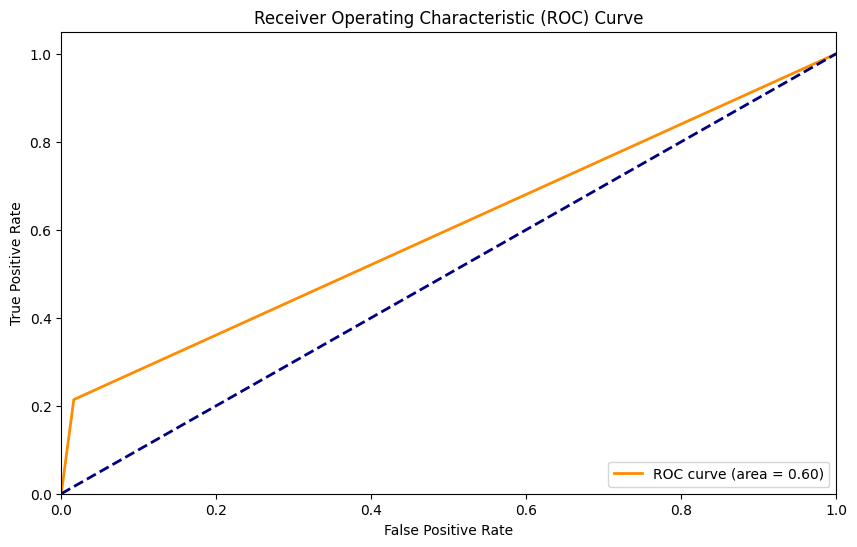

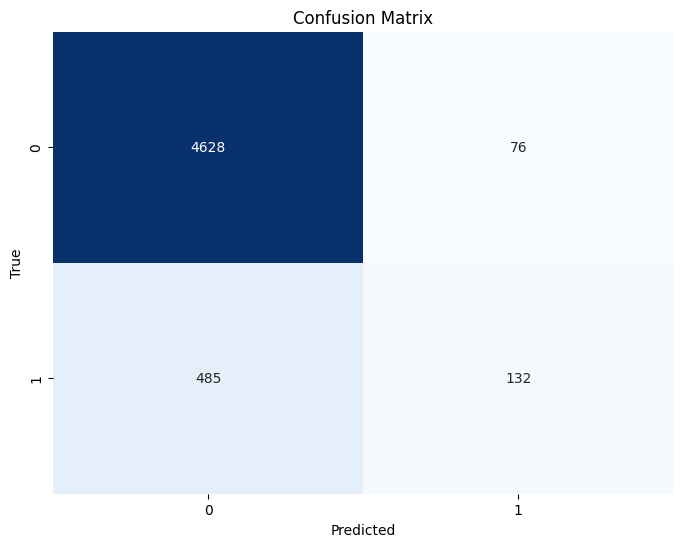

In [4]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Визуализация ROC-кривой
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, y_pred)

# Создание тепловой карты для визуализации матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [6]:
# best = np.zeros([3])



# for i in range(1, 15):
#         for j in range(1, 3):
#             model = CatBoostClassifier(iterations=1000, devices='0:1', depth=i,        # Глубина деревьев
#                                     learning_rate=1/(10**j),  # Скорость обучения
#                                     loss_function='Logloss',  # Функция потерь для задачи классификации
#                                     logging_level='Silent')
#             model.fit(X_train_std, y_train)

#             y_pred = model.predict(X_test_std)

#             accuracy = accuracy_score(y_test, y_pred)
#             report = classification_report(y_test, y_pred)

#             info = np.array([f'Глубина {i}', f'Скорость обучения {1/(10**j)}', accuracy])
#             print(info)
#             best = np.vstack((best, info))

# max_row_index = np.argmax(best[:, 2])

# # Extract the row with the maximum value
# max_row = best[max_row_index, :]

# print("Row with the maximum value in column {}: {}".format(2, max_row))


0.9129862807742906
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4771
           1       0.63      0.39      0.48       550

    accuracy                           0.91      5321
   macro avg       0.78      0.68      0.72      5321
weighted avg       0.90      0.91      0.90      5321

AUC-ROC: 0.6804315847640098
Feature Importance: [12.22995035  3.81872842  5.06465304  7.80522819  3.90394924  4.4966848
  5.37379821  0.01688582  0.27803338  0.16492032  1.0704662   0.09456989
  0.95665723  0.84955983  0.54349384 11.81318195  9.21639325  9.72618828
  9.89290976  0.07482131  0.73328254  1.6422226   2.80026338  0.68130135
  3.12847272  2.57746727  1.04591683]


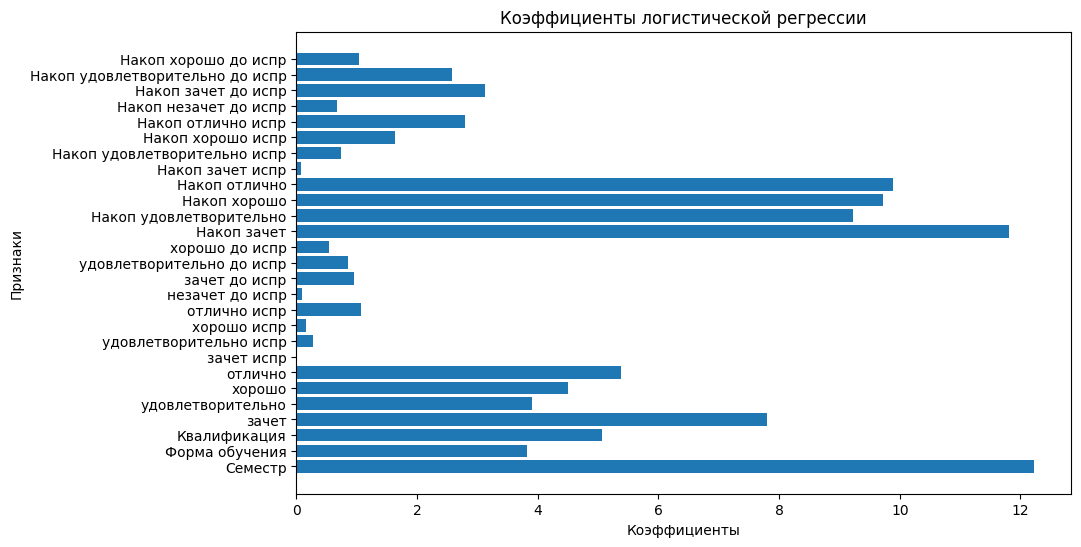

In [7]:
model = CatBoostClassifier(iterations=1000, devices='0:1', depth=5,        # Глубина деревьев
                                    learning_rate=0.1,  # Скорость обучения
                                    loss_function='Logloss',  # Функция потерь для задачи классификации
                                    logging_level='Silent')
model.fit(X_train_std, y_train)

y_pred = model.predict(X_test_std)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(accuracy)

print(report)

confusion_matrix(y_test, y_pred)

auc_roc = roc_auc_score(y_test, y_pred)

print(f'AUC-ROC: {auc_roc}')

feature_importance = model.get_feature_importance()
# Вывод важности признаков
print("Feature Importance:", feature_importance)
feature_names = ["Семестр","Форма обучения","Квалификация",
                 "зачет","удовлетворительно","хорошо","отлично",
                 "зачет испр","удовлетворительно испр","хорошо испр","отлично испр",
                 "незачет до испр","зачет до испр","удовлетворительно до испр","хорошо до испр",
                 "Накоп зачет","Накоп удовлетворительно","Накоп хорошо","Накоп отлично",
                 "Накоп зачет испр","Накоп удовлетворительно испр","Накоп хорошо испр","Накоп отлично испр",
                 "Накоп незачет до испр","Накоп зачет до испр","Накоп удовлетворительно до испр","Накоп хорошо до испр"]

# После обучения модели Logistic Regression (например, clf_lr)
# Берем коэффициенты для первого класса (в данном случае)

# Создаем график
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)

# Подписываем оси
plt.xlabel('Коэффициенты')
plt.ylabel('Признаки')
plt.title('Коэффициенты логистической регрессии')

plt.show()



In [8]:
confusion_matrix(y_test, y_pred)


array([[4645,  126],
       [ 337,  213]], dtype=int64)

In [9]:
print('Вероятность моего отчисления за первый семестр:',model.predict_proba(pd.read_csv('csv/uspevaemost_nakop_My.csv').iloc[:1,:])[:, 1] * 100)
print('Вероятность моего отчисления за второй семестр:',model.predict_proba(pd.read_csv('csv/uspevaemost_nakop_My.csv').iloc[1:2,:])[:, 1] * 100)
print('Вероятность моего отчисления за третий семестр:',model.predict_proba(pd.read_csv('csv/uspevaemost_nakop_My.csv').iloc[2:3,:])[:, 1] * 100)
print('Вероятность моего отчисления за четвертый семестр:',model.predict_proba(pd.read_csv('csv/uspevaemost_nakop_My.csv').iloc[3:4,:])[:, 1] * 100)

Вероятность моего отчисления за первый семестр: [1.79405888]
Вероятность моего отчисления за второй семестр: [1.73451467]
Вероятность моего отчисления за третий семестр: [0.1448897]
Вероятность моего отчисления за четвертый семестр: [0.57253403]


sum(y_pred == 1)

from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train_std, y_train)

# Make predictions
tree_predictions = tree_classifier.predict(X_test_std)

# Evaluate the model
tree_accuracy = accuracy_score(y_test, tree_predictions)
print(f"Decision Tree Accuracy: {tree_accuracy}")

report = classification_report(y_test,  tree_predictions)
print(report)
confusion_matrix(y_test, tree_predictions)

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train_std, y_train)

# Make predictions
rf_predictions = rf_classifier.predict(X_test_std)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")
report = classification_report(y_test, y_pred)
print(report)
confusion_matrix(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print(f'AUC-ROC: {auc_roc}')

Random Forest Accuracy: 0.9041533546325878
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4771
           1       0.63      0.39      0.48       550

    accuracy                           0.91      5321
   macro avg       0.78      0.68      0.72      5321
weighted avg       0.90      0.91      0.90      5321

AUC-ROC: 0.6804315847640098


from sklearn.svm import SVC

# Create and train an SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_std, y_train)

# Make predictions
svm_predictions = svm_classifier.predict(X_test_std)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")
report = classification_report(y_test, svm_predictions)
print(report)
confusion_matrix(y_test, svm_predictions)

from sklearn.naive_bayes import GaussianNB


    

# Create and train a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_std, y_train)

# Make predictions
nb_predictions = nb_classifier.predict(X_test_std)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy}")
report = classification_report(y_test, nb_predictions)
print(report)
confusion_matrix(y_test, nb_predictions)

In [3]:
from sklearn.neighbors import KNeighborsClassifier


knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train_std, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test_std)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {knn_accuracy}")
report = classification_report(y_test, y_pred)
print(report)
confusion_matrix(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print(f'AUC-ROC: {auc_roc}')

KNN Accuracy: 0.8945686900958466
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      4704
           1       0.63      0.21      0.32       617

    accuracy                           0.89      5321
   macro avg       0.77      0.60      0.63      5321
weighted avg       0.87      0.89      0.87      5321

AUC-ROC: 0.598890974542167


Row with the maximum value in column 2: ['Глубина 10' 'Скорость обучения 0.01' '0.9127774864534173']

import numpy as np

# Create an initial NumPy array
arr = np.array([1, 2, 3])

# Append a single element


# Append multiple elements (as a list)
new_elements = [5, 6, 7]
arr = np.vstack((arr, new_elements))

print(arr)

train_data = lgb.Dataset(X_train_std, label=y_train)
test_data = lgb.Dataset(X_test_std, label=y_test, reference=train_data)

# Определяем параметры модели
params = {
    'objective': 'binary',  # для задачи бинарной классификации
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',  # метрика качества
    'num_leaves': 50,
    'learning_rate': 0.01,
    'feature_fraction': 0.9
}

# Обучаем модель
num_round = 1000  # количество итераций обучения
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Предсказываем на тестовом наборе данных
y_pred = bst.predict(X_test_std, num_iteration=bst.best_iteration)

# Оцениваем качество модели
y_pred_binary = np.round(y_pred)  # преобразуем вероятности в бинарные предсказания
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
confusion_matrix(y_test, y_pred_binary)

params = {
    'objective': 'binary:logistic',  # для задачи бинарной классификации
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 1000,
    'eval_metric': 'logloss'
}

# Создаем объект DMatrix для данных
train_data = xgb.DMatrix(X_train_std, label=y_train)
test_data = xgb.DMatrix(X_test_std, label=y_test)

# Обучаем модель с ранней остановкой (early stopping)
watchlist = [(test_data, 'eval'), (train_data, 'train')]
num_round = 1000  # большое количество итераций
bst = xgb.train(params, train_data, num_round, evals=watchlist, early_stopping_rounds=10)

# Предсказываем на тестовом наборе данных
y_pred = bst.predict(test_data)

# Оцениваем качество модели
y_pred_binary = np.round(y_pred)  # преобразуем вероятности в бинарные предсказания
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
confusion_matrix(y_test, y_pred_binary)

y_test[y_test == 1].shape

sum(y_pred == 1)

for column, coef in zip(data.columns, lr.coef_[0]):
    print(f'Важность признака {column} равна {coef}')
